# 3 - Editing an IDF file

[Example 1 - Creating a blank IDF](../Example1/blank_idf.ipynb) demonstrated how to create an IDF file from raw data. Here we show how to edit/inspect the IDF file created previously:

## Loading the file

In [1]:
file_path = '../Example1/idf_example1.xml'

and load it when creating the IDF object:

In [2]:
# if pyIBA has been installed with pip3,
# the above 4 lines can be removed
import sys
from os.path import abspath
path_pyIBA = abspath('../../../..')
sys.path.insert(0, path_pyIBA)

# import pyIBA
from pyIBA import IDF

In [3]:
idf_file = IDF(file_path)

All the information included in the IDF object created on the previous example ([1 - Creating a blank IDF](../Example1/blank_idf.ipynb)) is now in the `idf_file` object.

## Editing

To edit a file, you can use the exact same methods used for creating a IDF file from scratch in [Example 1 - Creating a blank IDF](../Example1/blank_idf.ipynb). For instance, to change the beam energy, collection charge or the energy-channel calibration, you can do:

In [4]:
#change beam energy
idf_file.set_beam_energy(1600)
#change charge
idf_file.set_charge(10)
#change energy calibration
idf_file.set_energy_calibration(2.5, 150)

## Save changes

It is important to have in mind that the information changed so far is only in the IDF object here and that the IDF file is unaltered. This is done to make it easy to recover the original data when mistakes are made. To do this o simply need to IDF reinitialise the object as above:

    idf_file = IDF(file_path)
    
or create a new one

    idf_file_original = IDF(file_path)
    
if you don't want to lose the changes already made.
  
To save it to the disk you can:

1. overwrite the original file by pointing `save_idf()` to it (i.e. *save*):

    idf_file.save_idf(file_path)
    
2. create a new file by pointing `save_idf()` to a new file (i.e. *save as*)

    idf_file.save_idf(path_to_new_file)
    
    
> Note: No warning is issued in case a file is being overwritten!
    
    
Here we opt to create a new file:

In [5]:
#set the path to the new IDF file:
path_file_edited = '../Example3/idf_example3.xml'

#save the edited IDF object to this file
idf_file2 = idf_file.save_idf(path_file_edited)

Note that the `save_idf()` returns and IDF object corresponding to the IDF file just created, equivalent of doing:

    idf_file_2 = IDF(path_file_edited)
    
after saving it.

#  Dynamic editing

The above steps can, of course, be done dynamically. This possibility brings a lot of potential to the IDF format since it allows for editing parameters autonomosly in function of an analysis or other experiments results .
  
Another possibility is when there are multiple measurements of samples very similar to each other. In the following example, we create 20 IDF files for each RBS measurement performed at different points of a sample. We start with an IDF file created previously (for this exact file see Example [How to create IDFs from NDF files](../advanced_examples/Example_a5/creating_IDFs_from_NDF.ipynb)) and use it as a template for the remaining measurements.

## Setting the files parameters

We first save the changed into a new IDF file:

In [6]:
#set the path to the new IDF file:
path_file_temp = '../Example3/idf_example3_1.xml'

#save the edited IDF object to this file
idf_file = idf_file.save_idf(path_file_temp)

Afterwards, we set the path for the 10 files. In this case all the files have very similar names with only the last character (used as file ID ranging from 1 to 10) changing. Thus we can do the following:

In [7]:
nfiles = 10
file_names = ['raw_data_files/RBS1_2IN_P_%i_n.odf'%i for i in range(1, nfiles + 1)]

#print file names
file_names

['raw_data_files/RBS1_2IN_P_1_n.odf',
 'raw_data_files/RBS1_2IN_P_2_n.odf',
 'raw_data_files/RBS1_2IN_P_3_n.odf',
 'raw_data_files/RBS1_2IN_P_4_n.odf',
 'raw_data_files/RBS1_2IN_P_5_n.odf',
 'raw_data_files/RBS1_2IN_P_6_n.odf',
 'raw_data_files/RBS1_2IN_P_7_n.odf',
 'raw_data_files/RBS1_2IN_P_8_n.odf',
 'raw_data_files/RBS1_2IN_P_9_n.odf',
 'raw_data_files/RBS1_2IN_P_10_n.odf']

Otherwise, the files can be written out one by one into a list:

    file_names = ['RBS1_2IN_P_1',
                  'RBS1_2IN_P_2',
                  ...
                 ]
                 

## Creating new IDF objects using the template

We now can loop through each element of the `file_names` list and:
1. create a copy of the original IDF object;
2. change the spectrum on this new copy.

For future use, we can also save the new IDFs in a list, below named of `list_idf_files`.

In [8]:
list_idf_files = []

#loop through the list of file names
for file in file_names:
    #make an identical copy of the IDF object
    idf_file_new = idf_file.copy()
    
    #change the spectrum of new object
    idf_file_new.set_spectrum_data_from_file(file)
    
    #save new file in the list for posterior use
    list_idf_files.append(idf_file_new)    

> **Note**: that in the above, the `copy()` method is used to make a copy of `idf_file`. Remember that in python, the `=` operations does not copy objects but simply assigns a new variable to the same object. For instance,

    idf_file1 = IDF()
    idf_file2 = idf_file1

>it assigning two variables (`idf_file1` and `idf_file2`) to the same `IDF()` object. This means that if we use one of the references the other is going to change as well, i.e.:

    idf_file1.set_spectrum_data(channels, counts)

>will also change the spectrum in `idf_file2` since both references point to the same object. To make a true copy of an object one needs to use the module `copy.deepcopy`, as it is implemented in `IDF.copy()`.

We also want to add a note to save the position in which the measurement was performed. In this case, each measurement was made a distance of 5 mn from the one before long the x direction. There are multiple ways of defining a list with the positions. Here we use the `numpy.arange()`.

In [9]:
delta_x = 0

#list through the list of IDF objects
for idf in list_idf_files:
    #append a note with the position
    idf.set_note('x-position: %0.1f' %delta_x, append = True)
    
    #increment delta_x
    delta_x += 0.5

Note that you can also save variables directly to the IDF object. Those will not be saved into the IDF file by the `save_idf()`. For instance, in the above, it might be use full to store the position directly on the object for fast access:

In [10]:
delta_x = 0

#list through the list of IDF objects
for idf in list_idf_files:
    #add the x-position directly to each IDF object
    idf.delta_x = delta_x
    delta_x += 0.5    

## Checking the loaded spectra

We can use matplotlib to do a quick plot the entire spectra set. We can also retrieve the original file name and the position and use them as labels in the plot.
  
We first import the matplotlib library:

In [11]:
#import the plotting library
import matplotlib.pyplot as plt
# %matplotlib notebook
plt.rcParams.update({'font.size': 12})

Then, we loop through each IDF object in the list `list_idf_files` (containing our new spectra), plotting the corresponding spectrum:

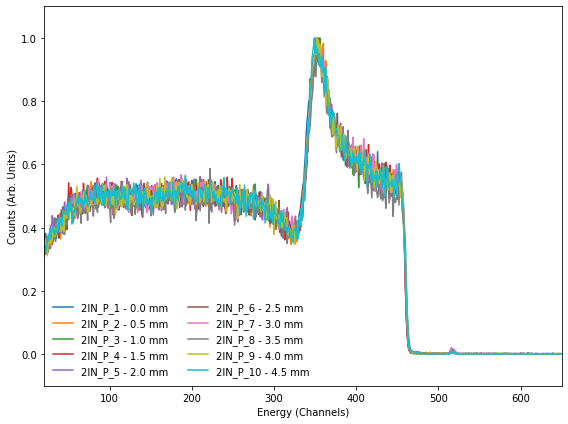

In [12]:
#create a figure
plt.figure(figsize=(8,6))

#loop through each idf object in the list
for idf in list_idf_files:
    #get the file name for labeling
    name = idf.get_spectrum_file_name()
    #reduce the name to the essencial information
    name = name[5:-6]
    #add the x-position to the name
    name = name + ' - %.1f mm' %idf.delta_x
    
    
    #get the channels and counts
    xx, yy = idf.get_dataxy()
    
    #plot
    plt.plot(xx, yy, label = name)
    
#set plot details
plt.xlim(20, 650)
plt.ylim(-0.1,1.1)
plt.legend(ncol = 2, frameon = False)
plt.xlabel('Energy (Channels)')
plt.ylabel('Counts (Arb. Units)')
plt.tight_layout()

## Saving the new IDF objects

So far, the IDFs created here are not saved into the disk. As previously (see [Save changes](#Save-changes) above), we use `save_idf()` to do this:

In [13]:
#loop through each idf object in the list
for file in list_idf_files:
    #change the original extension 'odf' to 'xml' (or define your own name scheme)
    path_save = file.get_spectrum_file_name()[:-4] + '.xml'
    
    #save the IDF object to disk
    file.save_idf(path_save)
    
    #print the name of the new files
    print(path_save)

RBS1_2IN_P_1_n.xml
RBS1_2IN_P_2_n.xml
RBS1_2IN_P_3_n.xml
RBS1_2IN_P_4_n.xml
RBS1_2IN_P_5_n.xml
RBS1_2IN_P_6_n.xml
RBS1_2IN_P_7_n.xml
RBS1_2IN_P_8_n.xml
RBS1_2IN_P_9_n.xml
RBS1_2IN_P_10_n.xml


## Notes:

The above process combines groups the spectrum and the related details in a single file. Despite useful, this is still quite inefficient in terms of data management since we still have 10 files for what is essentially the same experiment. In the next Example ([4- Adding multiple spectra to a IDF file](../Example4/muitple_spectra_IDF.ipynb)) we will see how it is possible to group the 10 measurements under a single IDF file.